In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as пр
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
%%writefile contentRetailer.json
{"intents":[
    {
        "tag":"greeting",
                                              
        "input":[
               "Hello",
              "Hello there!",
              "Hi!",
              "Hey, how are you?",
              "Good day!",
              "Good morning!",
              "Good afternoon!",
              "Good evening!",
              "Howdy!",
              "Greetings!",
              "Salutations!",
              "What's up?",
              "Yo!",
              "Good to see you!",
              "Welcome back!",
              "Hiya!",
              "Hey there, how's it going?",
              "Nice to meet you!"

        ],
        "responses":[
            "Hello! How can I help you today?",
            "Hi there! What can I assist you with?",
            "Hey, how can I assist you?",
            "Good [morning/afternoon/evening]! How may I assist you?",
            "Greetings! What can I help you with today?",
            "Hello! How may I assist you today?",
            "Hi there! How can I help you?",
            "Hey! What can I do for you?",
            "Good day! What can I help you with?",
            "hey! How may I assist you today?",
            "hey! What can I help you find?",
            "Hi! What do you need help with?",
            "Greetings! How can I assist you today?",
            "Salutations! What can I help you with?",
            "Hi there, welcome back! How may I assist you?",
            "It's great to hear from you! What can I do for you?",
            "What can I help you with today?",
            "How can I assist you with your request?",
            "What can I assist you with today?",
            "What can I do to help you?",
            "How can I support you today?",
            "What do you need assistance with?",
            "What can I help you find today?"
          ]
        
    },
    { 
        "tag":"sales_month",
                                              
        "input":[
             "What was the total income from sales for this month?",
            "Could you provide me with the total sales income for the current month?",
            "Can you give me an update on the sales income for this month so far?",
            "What is the sales income total for this month up to this point?",
            "May I know how much sales income has been generated this month?",
            "Can you provide me with the sales income figure for the current month to date?",
            "I'm curious about the total sales income for this month. Can you share that with me?",
            "Could you please tell me how much income from sales has been made this month?",
            "Can you give me an idea of the total sales income for this month?",
            "What is the current amount of sales income for this month that has been recorded?"
        ],
        "responses":[
              "month_sales"
            ]
        
    },
     { 
        "tag":"sales_year",
                                              
        "input":[
              "What was the total sales income for this year so far?",
              "Could you provide me with the total sales income for the current year?",
              "Can you give me an update on the sales income for this year up to this point?",
              "What is the sales income total for this year up to now?",
              "May I know how much sales income has been generated this year?",
              "Can you provide me with the sales income figure for the current year to date?",
              "I'm curious about the total sales income for this year. Can you share that with me?",
             "Could you please tell me how much income from sales has been made this year?",
              "Can you give me an idea of the total sales income for this year?",
              "What is the current amount of sales income for this year that has been recorded?"
        ],
        "responses":[
              "year_sales"
            ]
        
    },
     { 
        "tag":"sales_total",
                                              
        "input":[
            "What is the overall total sales income?",
            "Could you provide me with the complete sales income figure?",
           "What is the total amount of sales income generated so far?",
            "May I know the entire sales income recorded?",
            "Can you give me an update on the total sales income?",
            "I would like to know the full sales income amount. Can you tell me that?",
            "Could you please provide me with the total sales income figure?",
            "What is the cumulative total sales income?",
            "Can you give me an idea of the overall sales income?",
            "I'm interested in knowing the total sales income. Can you provide that information?"
        ],
        "responses":[
              "sales_total"
            ]
        
    },
     { 
        "tag":"stock_month",
                                              
        "input":[
              "What is the total stock for this month?",
              "Could you provide me with the current month's total stock?",
              "Can you give me an update on the total stock for this month?",
              "How much stock is available for this month?",
              "May I know the amount of stock for this month?",
              "Can you provide me with the total stock figure for the current month?",
             "I'm interested in knowing the total stock for this month. Can you share that with me?",
              "Could you please tell me how much stock is available for this month?",
              "Can you give me an idea of the overall stock for this month?",
              "What is the current total stock available for this month?"
        ],
        "responses":[
              "stock_month"
            ]
        
    },
        { 
        "tag":"stock_year",
                                              
        "input":[
              "What is the total stock for this year so far?",
              "Could you provide me with the current year's total stock?",
              "Can you give me an update on the total stock for this year up to this point?",
              "How much stock is available for this year?",
              "May I know the amount of stock for this year?",
              "Can you provide me with the total stock figure for the current year?",
              "I'm interested in knowing the total stock for this year. Can you share that with me?",
              "Could you please tell me how much stock is available for this year?",
              "Can you give me an idea of the overall stock for this year?",
              "What is the current total stock available for this year that has been recorded?"
        ],
        "responses":[
              "stock_year"
            ]
        
    },
      { 
        "tag":"sales_forecast",
                                              
        "input":[
              "What are the sales forecasting values for the upcoming month?",
              "Can you provide me with the sales predictions for next month?",
              "What is the estimated sales figure for the next month?",
              "May I know the forecasted sales values for the upcoming month?",
              "Can you give me an idea of the expected sales for the next month?",
              "I'm curious about the sales forecasting values for the next month. Can you share that with me?",
              "Could you please tell me what the predicted sales figures are for the next month?",
              "Can you give me an update on the sales forecasting values for the next month?",
              "What is the expected sales performance for the upcoming month?",
              "Can you provide me with the sales forecast for the next month?"
        ],
        "responses":[
              "sales_forecast"
            ]
        
    },
     { 
        "tag":"stock_forecast",
                                              
        "input":[
                "What are the stock forecasting values for the upcoming month?",
                "Can you provide me with the inventory predictions for next month?",
                "What is the estimated stock figure for the next month?",
                "May I know the forecasted stock values for the upcoming month?",
                "Can you give me an idea of the expected stock levels for the next month?",
                "I'm curious about the stock forecasting values for the next month. Can you share that with me?",
                "Could you please tell me what the predicted stock figures are for the next month?",
                "Can you give me an update on the stock forecasting values for the next month?",
                "What is the expected stock performance for the upcoming month?",
                "Can you provide me with the stock forecast for the next month?"
        ],
        "responses":[
              "stock_forecast"
            ]
        
    },


     { 
        "tag":"goodbye",
                                              
        "input":[
              "Thanks, that's all for now",
              "That's all I needed, thanks",
              "Thank you for your help",
              "Goodbye",
              "Bye",
              "See you later",
              "Take care",
              "Thanks for your assistance"
        ],
        "responses":[
              "Thank you for visiting us. Have a great day!",
              "Thank you for considering our products. Have a great day!",
              "It was a pleasure assisting you. Have a great day!",
              "Thank you for your visit. Come back soon!",
              "Goodbye! Don't hesitate to reach out if you have any further questions or concerns."
            ]
        
    }
    

  ]
 }


Writing contentRetailer.json


In [ ]:
#import dataset
with  open('contentRetailer.json') as content:
  data1=json.load(content)


In [ ]:
#getting all the data to list
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for line in intent['input']:
    inputs.append(line)
    tags.append(intent['tag'])


In [ ]:
#converting to dataframe
data=pd.DataFrame({"inputs":inputs,"tags":tags})

In [ ]:
data

inputs      tags
0                        Hello  greeting
1                 Hello there!  greeting
2                          Hi!  greeting
3            Hey, how are you?  greeting
4                    Good day!  greeting
..                         ...       ...
91                     Goodbye   goodbye
92                         Bye   goodbye
93               See you later   goodbye
94                   Take care   goodbye
95  Thanks for your assistance   goodbye

[96 rows x 2 columns]

In [ ]:
#removing punctuaions
import string
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower()for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))

In [ ]:
data

inputs      tags
0                        hello  greeting
1                  hello there  greeting
2                           hi  greeting
3              hey how are you  greeting
4                     good day  greeting
..                         ...       ...
91                     goodbye   goodbye
92                         bye   goodbye
93               see you later   goodbye
94                   take care   goodbye
95  thanks for your assistance   goodbye

[96 rows x 2 columns]

In [ ]:
from pandas.core.computation.parsing import tokenize

#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence  import pad_sequences
x_train=pad_sequences(train)

#encording the outputs
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [ ]:
import pickle

# Save the tokenizer to disk
with open('tokenizer_retailer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder to disk
with open('label_encoder_retailer.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle

# Load the tokenizer from disk
with open('tokenizer_retailer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load the label encoder from disk
with open('label_encoder_retailer.pickle', 'rb') as handle:
    le = pickle.load(handle)

In [ ]:
input_shape=x_train.shape[1]
print(input_shape)

17


In [ ]:
#define vocabulary
vocabulary=len(tokenizer.word_index)
print(f'numver of unique words :{vocabulary}')

output_lengh=le.classes_.shape[0]
print(f'output length :{output_lengh}')


numver of unique words :117
output length :9


In [ ]:
#creating the model
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_lengh,activation="softmax")(x)
model=Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 5s 18ms/step - loss: 2.1988 - accuracy: 0.0729
Epoch 2/200
3/3 [==============================] - 0s 33ms/step - loss: 2.1934 - accuracy: 0.1042
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 2.1882 - accuracy: 0.2708
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 2.1826 - accuracy: 0.2708
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 2.1767 - accuracy: 0.2500
Epoch 6/200
3/3 [==============================] - 0s 31ms/step - loss: 2.1694 - accuracy: 0.2500
Epoch 7/200
3/3 [==============================] - 0s 22ms/step - loss: 2.1607 - accuracy: 0.2396
Epoch 8/200
3/3 [==============================] - 0s 14ms/step - loss: 2.1503 - accuracy: 0.2396
Epoch 9/200
3/3 [==============================] - 0s 15ms/step - loss: 2.1382 - accuracy: 0.2396
Epoch 10/200
3/3 [==============================] - 0s 15ms/step - loss: 2.1225 - accuracy: 0.2396
Epoch 11/200
3/3 [=

In [ ]:
from keras.models import load_model
model.save("LSTM_ChatBot_Retailer.h5")

In [ ]:
model = load_model("LSTM_ChatBot_Retailer.h5")

Text(0, 0.5, 'accuracy')

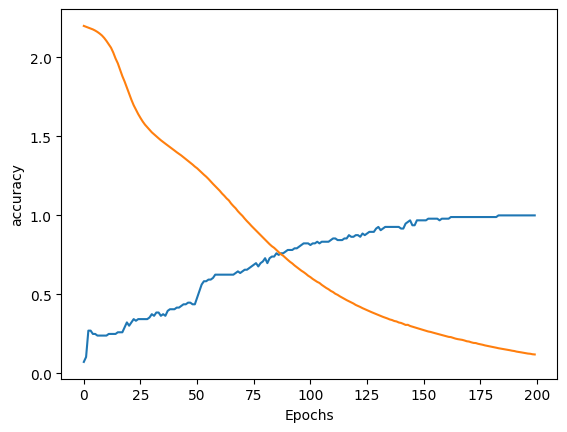

In [ ]:
#Model Analyse
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [ ]:
#testing
import random
import numpy as np
while True:
  texts_p = []
  prediction_input = input("You: ")

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation] 
  prediction_input=''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences (texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences ([prediction_input], input_shape)

  #getting output from model
  output= model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting

  response_tag= le.inverse_transform([output])[0]
  print("Bot: ", random.choice(responses [response_tag]))
  if response_tag=="goodbye":
    break


You: hi
1/1 [==============================] - 0s 447ms/step
Bot:  hey! How may I assist you today?
You: What was the total sales income for this year so far?
1/1 [==============================] - 0s 24ms/step
Bot:  year_sales
You: bye
1/1 [==============================] - 0s 23ms/step
Bot:  Thank you for considering our products. Have a great day!
